<a id="toc_section"></a>
## Table of Contents
* [Introduction](#top_section)
    - [Well... What do we have here?](#section1)
* [Exploring the Data](#section2)
    - [Categorical Features](#section3)
    - [Numerical Features](#section4)
    - [Missing Values](#section5)    
* [Building the Feature Engineering Machine](#section6)
    - [Data Merger](#section7)
    - [Family Assembler](#section8)
    - [Family Survival Detector](#section9)   
    - [Title Extractor](#section10)
    - [Title Encoder](#section11)
    - [Age Filler](#section12)
    - [Age Grouper](#section13)
    - [Fare Imputer](#section14)
    - [Fare Encoder](#section15)
    - [Scaler](#section16)
    - [Embarked Processor](#section17)
    - [Deck Finder](#section18)
    - [Gender Mapper](#section19)
    - [Pclass Sorter](#section20)
    - [Ticket Cleaner](#section21)
    - [Housekeeping](#section22)
    - [Feeding the Machine](#section23)
* [Double Check](#section24)
    - [Correlation Matrix](#section25)
* [Modelling](#section26)
    - [Model Selection](#section27)
    - [Cross-Validate Models](#section28)
    - [Model Results](#section29)
    - [ROC'S of the Models](#section30)
    - [Learning Curves of the Models](#section31)
* [Feature Selection](#section31.1)
    - [Feature Importances](#section32)
    - [Decision Trees](#section33)    
    - [Feature Selection by Recursive Feature Elimination](#section34)
    - [Dimension Reduction by Principal Component Analysis](#section35)
    - [Reduced Dimension Model Results with Cross-Validation](#sectioncv)
* [Plotting Decision Boundaries](#section36)
* [Plotting Decision Regions](#section37)
* [Submission & Some Last Words](#sectionlst)

<a id="Extract"></a>
# 1. Extract

<a id="top_section"></a>
# 2. Introduction



### My main objectives on this project are:

* Explorating and visualising the data, trying to get some insights about our dataset
* Getting data in better shape by feature engineering to help us in building better models
* Building and tuning couple regression models to get some stable results on predicting Titanic disaster outcome

### In this notebook we are going to try explore the data we have and going try answer questions like:

- What is the ditribution of Sale Price in the training data
- What are the categorical and continuous attributes of the data set?
- Which attributes are too focused on one attributes?

<a id="section1"></a>
# 3. Loading and Exploring the data


### [Back To Table of Contents](#toc_section)

In [18]:
## 3.1 Loading Libraries required and reading the data into Python

In [1]:
# Importing neccesary packages.

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

#

from scipy import interp
import math
from scipy.stats import norm
from scipy import stats

#

import warnings
warnings.filterwarnings('ignore') # Disabling warnimgs for clearer outputs
pd.options.display.max_columns = 50 # Pandas option to increase max number of columns to display
plt.style.use('ggplot') # Setting default plot style


In [2]:
# Read train and test data from csv files for visualization
v_train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
v_test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')
idx = len(v_train)

## 3.2 Data size and structure

Ok we have two sets(train and test) data and in total 2219 observations 80 features. Our target is SalePrice column which is not present on the test set(duh!)... 

For the rest we gonna inspect them individually soon but  generally speaking they look mostly categorical data with some continuous values like YearBuilt and Fireplaces.


In [3]:
# Checking train and test sets
display(v_train.sample(3))
display(v_test.sample(3))

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
219  220         120       RL         43.0     3010   Pave   NaN      Reg   
361  362          50       RL          NaN     9144   Pave  Pave      Reg   
628  629          60       RL         70.0    11606   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
219         Lvl    AllPub    Inside       Gtl      Blmngtn       Norm   
361         Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
628         HLS    AllPub    Inside       Sev        NAmes       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
219       Norm   TwnhsE     1Story            7            5       2005   
361       Norm     1Fam     1.5Fin            5            5       1940   
628       Norm     1Fam     2Story            5            5       1969   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  ... Fireplaces  \
219          2006     Gable  CompShg     VinylSd     VinylSd  ...          0   
361          1982     Gable  CompShg     MetalSd     MetalSd  ...          0   
628          1969     Gable  CompShg     Plywood     Plywood  ...          2   

     FireplaceQu GarageType GarageYrBlt GarageFinish GarageCars GarageArea  \
219          NaN     Attchd      2005.0          Fin          2        438   
361          NaN     Detchd      1940.0          Unf          1        240   
628           TA     Attchd      1969.0          Unf          2        504   

    GarageQual GarageCond  PavedDrive WoodDeckSF  OpenPorchSF  EnclosedPorch  \
219         TA         TA           Y        108            0              0   
361         TA         TA           N          0            0              0   
628         TA         TA           Y        335            0              0   

     3SsnPorch ScreenPorch PoolArea PoolQC Fence  MiscFeature  MiscVal  \
219          0           0        0    NaN   NaN          NaN        0   
361          0           0        0    NaN   NaN          NaN        0   
628          0           0        0    NaN   NaN          NaN        0   

     MoSold  YrSold  SaleType  SaleCondition  SalePrice  
219       3    2006       New        Partial     167240  
361       7    2008        WD         Normal     145000  
628       9    2007        WD         Family     135000  

[3 rows x 81 columns]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
41   1502         160       FV          NaN     2403   Pave   NaN      IR1   
130  1591          20       RL         64.0     6410   Pave   NaN      Reg   
821  2282         120       RH         26.0    10943   Pave   NaN      IR2   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
41          Lvl    AllPub       FR2       Gtl      Somerst       Norm   
130         HLS    AllPub    Inside       Gtl      Edwards       Norm   
821         Lvl    AllPub       FR2       Gtl        NAmes       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
41        Norm   TwnhsE     2Story            7            5       2003   
130       Norm     1Fam     1Story            4            5       1958   
821       Norm   TwnhsE     1Story            6            5       1997   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  ... Functional  \
41           2003     Gable  CompShg     VinylSd     VinylSd  ...        Typ   
130          1958       Hip  CompShg     WdShing     Wd Shng  ...        Typ   
821          1998     Gable  CompShg     MetalSd     MetalSd  ...        Typ   

     Fireplaces FireplaceQu GarageType GarageYrBlt GarageFinish GarageCars  \
41            0         NaN     Attchd      2003.0          RFn        2.0   
130           0         NaN        NaN         NaN          NaN        0.0   
821           1          TA     Attchd      1997.0          Fin        2.0   

    GarageArea GarageQual  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
41       496.0         TA          TA          Y           0           50   
130        0.0        NaN         NaN          Y           0            0   
821      522.0         TA          TA          Y           0           68   

     EnclosedPorch 3SsnPorch ScreenPorch PoolArea PoolQC  Fence  MiscFeature  \
41               0         0           0        0    NaN    NaN          NaN   
130              0         0           0        0    NaN  MnPrv          NaN   
821              0         0           0        0    NaN    NaN          NaN   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition  
41         0       6    2010        WD         Normal  
130        0       5    2010        WD         Normal  
821        0      10    2007        WD         Normal  

[3 rows x 80 columns]

# 4 Eploring Important Attritubes

## 4.1 The response variables; SalePrice

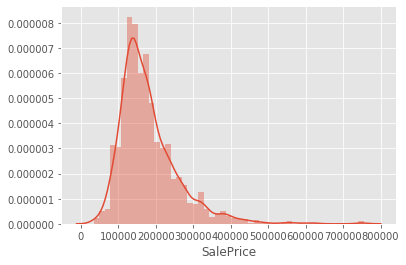

In [4]:
count = v_train['SalePrice'].value_counts(ascending=True)
sns.distplot(v_train['SalePrice']) 

In [5]:
display( v_train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


To get a general idea on the distribution of our targeted output.

As show on the statistics, the avearage distribution lie on around 160,000. The lower and upper quartile is at 130,000 and 214,000 respectively.

 (c&p)This was expected as few people can afford very expensive houses. 

In [6]:
# Merging visualization datasets.
v_train.drop('Id', axis=1, inplace=True);
v_test.drop('Id', axis=1, inplace=True);
v_merged = pd.concat([v_train, v_test])


<a id="section2"></a>
# Numeric Attritubes

We get a first glimpse to the correlation of all numeric attritubes with SalePrice the response variable.

In [50]:
# numeric_vars = v_train.apply()
# display(v_train.d_type)

numeric_vars = v_train.select_dtypes(include=['int64', 'float64'])
# numeric_vars = pd.concat([numeric_vars['SalePrice'], numeric_vars[:-1]])
# numeric_attritubes = numeric_vars.columns.values
numeric_attritubes = list(numeric_vars)
numeric_attritubes.insert(0, numeric_attritubes.pop(numeric_attritubes.index('SalePrice')))

# reorder column SalePrice to the front
numeric_vars = numeric_vars[numeric_attritubes]


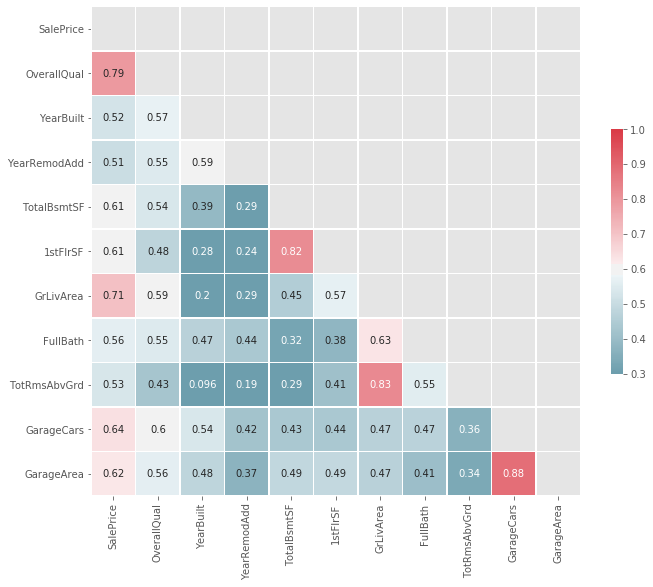

In [60]:
corr = numeric_vars.corr()
corr = corr.loc[corr['SalePrice']>0.5, corr['SalePrice']>0.5]
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=0.3, vmax=1, center=0.6, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From all the numeric values, ony 10 numeric attributes has a corrleation higher than 0.5 with the saleprice

As seen from the first column, OverallQual has the highest correlation with the SalePrice. The second is GrLiveArea

We can see that there is 2919 entries in total with 80 features

In [7]:
# Checking merged shape
display(v_merged.shape)

(2919, 80)

<a id="section3"></a>
## Categorical Features

- **MSSubClass**: Identifies the type of dwelling involved in the sale.
- **MSZoning**: Identifies the general zoning classification of the sale.
- **Street**: Type of road access to property
- **Alley**: Type of alley access to property
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits

## Numerical Features
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet


In [8]:
# Selecting categorical data for univariate analysis
cats = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2']


def plotFrequency(cats):
    #"A plot for visualize categorical data, showing both absolute and relative frequencies"
    fig, axes = plt.subplots(math.ceil(len(cats) / 2), 2, figsize=(20,12))
    axes = axes.flatten()

    for ax, cat in zip(axes, cats):
        if cat == 'Survived':
            total = float(len(v_train[cat]))
        else:
            total = float(len(v_merged[cat]))
        sns.countplot(v_merged[cat], palette='plasma', ax=ax)

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 10,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha="center")

        plt.ylabel('Count', fontsize=15, weight='bold')

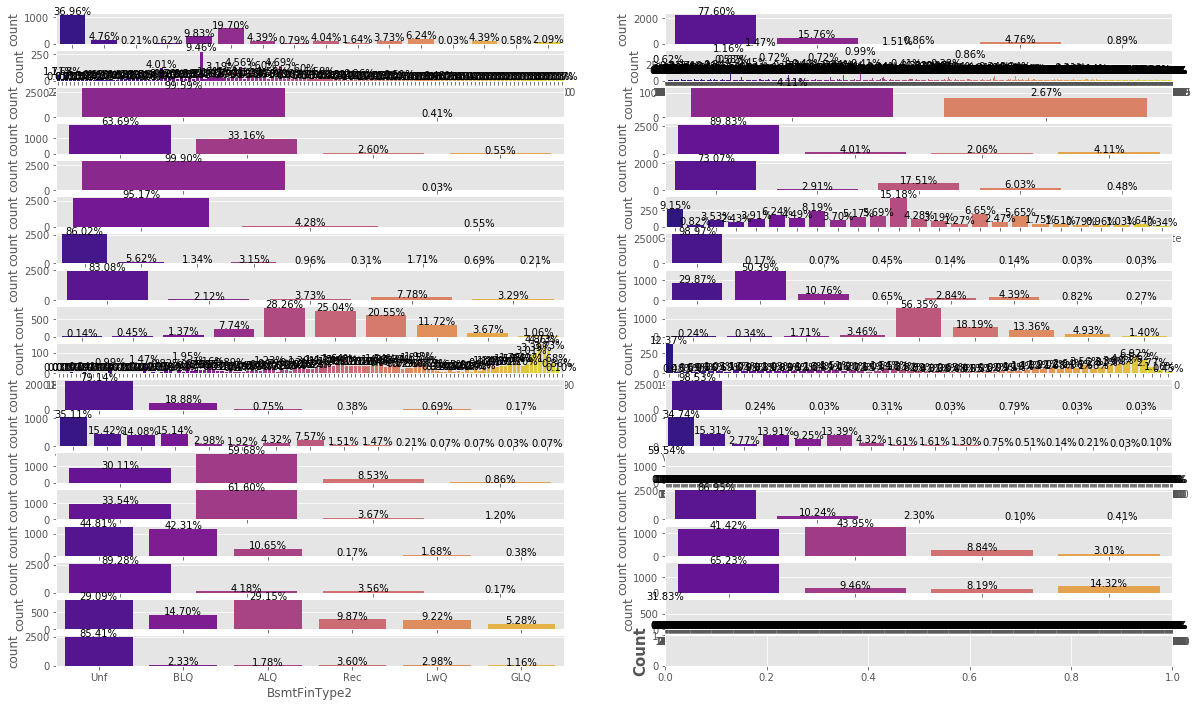

In [9]:
plotFrequency(cats)

<a id="section5"></a>
## 5. Missing Values

On both datasets Cabin feature is missing a lot, it looks this feature not useful for modelling but we might give it a chance with feature engineering later.

Again, Age feature has many missing values, we can impute them with some logical way to use later...

There are little number of missing values on Embarked and Fare, I think we can impute them without taking much risk.

### [Back To Table of Contents](#toc_section)

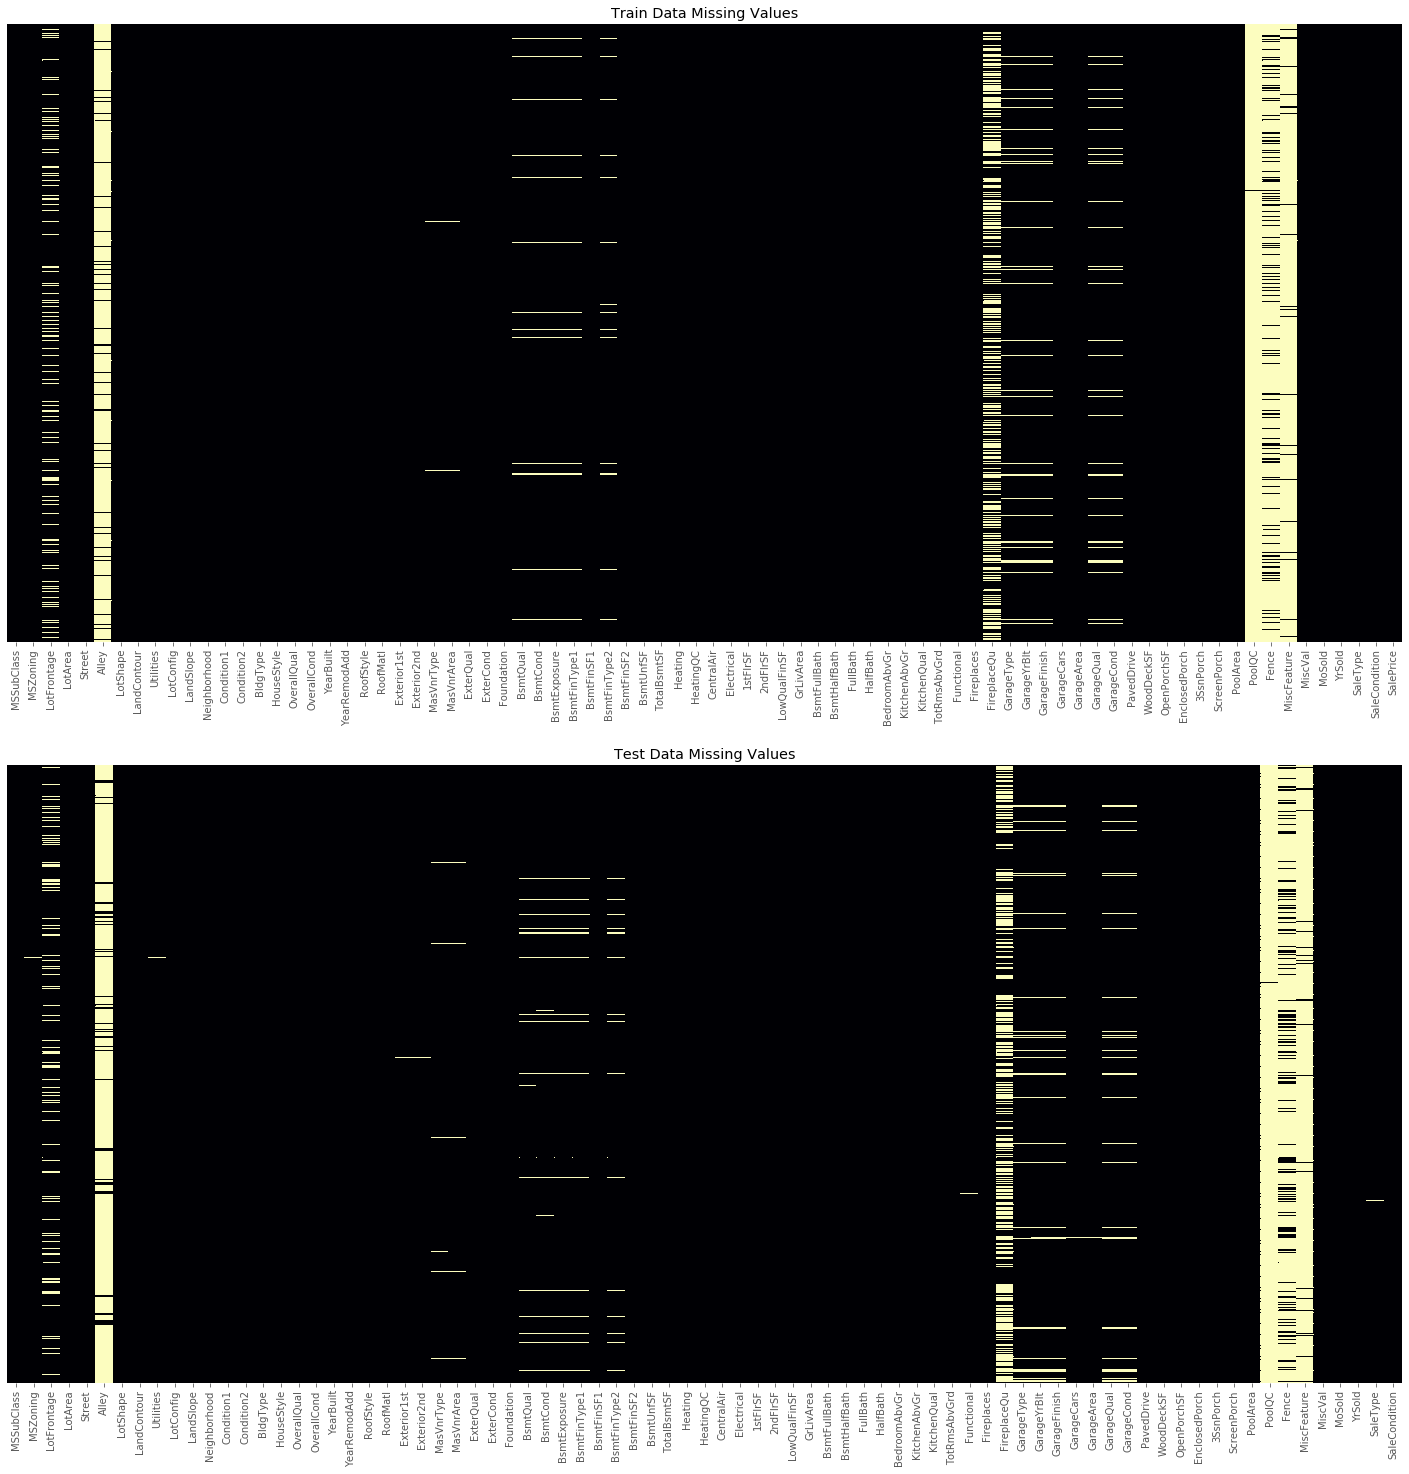

In [10]:
# Visualising missing data

fig, ax = plt.subplots(nrows=2, figsize=(25, 25))
half = len(v_train)/2
sns.heatmap(v_train.loc[:half].isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax[0])
sns.heatmap(v_test.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax[1])

ax[0].set_title('Train Data Missing Values')
ax[1].set_title('Test Data Missing Values')

plt.xticks(rotation=90)
plt.show()

In [11]:
# Make Table to see NA values and class in total data set

def get_na_and_d_type(column):
    num_na = column.isnull().sum()
    dtype = column.dtype
    sample =column.sample(n=4).reset_index( drop=True)
    data_1= pd.Series({'number of missing data': num_na,'data type': dtype})
    return pd.concat([data_1, sample, ], )

v_merged_na = v_merged.apply(get_na_and_d_type, axis=0).sort_values(by='number of missing data', axis=1, ascending=False)
# v_merged_na = v_merged_na.loc[v_merged_na['number of missing data'] != 0]
v_merged_na


PoolQC MiscFeature   Alley   Fence SalePrice  \
number of missing data    2909        2814    2721    2348      1459   
data type               object      object  object  object   float64   
0                          NaN         NaN     NaN     NaN     39300   
1                          NaN         NaN     NaN     NaN       NaN   
2                          NaN         NaN     NaN     NaN       NaN   
3                          NaN         NaN     NaN     NaN    152000   

                       FireplaceQu LotFrontage GarageCond GarageFinish  \
number of missing data        1420         486        159          159   
data type                   object     float64     object       object   
0                               Gd          64         TA          Unf   
1                              NaN          21         TA          RFn   
2                              NaN          75        NaN          Unf   
3                              NaN          63        NaN          Unf   

                       GarageQual GarageYrBlt GarageType BsmtCond  \
number of missing data        159         159        157       82   
data type                  object     float64     object   object   
0                              TA        1980     Attchd       Gd   
1                              TA        1970     Attchd       TA   
2                              TA        1957     Attchd       TA   
3                              TA        1965     Detchd       TA   

                       BsmtExposure BsmtQual BsmtFinType2 BsmtFinType1  \
number of missing data           82       81           80           79   
data type                    object   object       object       object   
0                                Av      NaN          Unf          Unf   
1                                No       Gd          Rec          ALQ   
2                                Av       Gd          Unf          Unf   
3                                No       TA          Unf          BLQ   

                       MasVnrType MasVnrArea MSZoning BsmtHalfBath Utilities  \
number of missing data         24         23        4            2         2   
data type                  object    float64   object      float64    object   
0                         BrkFace          0       RL            0    AllPub   
1                            None         40       RL            0    AllPub   
2                         BrkFace          0       RL            0    AllPub   
3                            None          0       RL            0    AllPub   

                       BsmtFullBath Functional Exterior2nd  ... LotShape  \
number of missing data            2          2           1  ...        0   
data type                   float64     object      object  ...   object   
0                                 0        Typ     VinylSd  ...      IR1   
1                                 1        Typ     Plywood  ...      Reg   
2                                 0        Typ     VinylSd  ...      Reg   
3                                 2        Typ     VinylSd  ...      IR1   

                       LandContour LotConfig LandSlope Neighborhood  \
number of missing data           0         0         0            0   
data type                   object    object    object       object   
0                              Lvl    Inside       Gtl      SawyerW   
1                              Bnk    Inside       Gtl      Crawfor   
2                              Lvl   CulDSac       Gtl      NridgHt   
3                              Lvl    Corner       Gtl      BrkSide   

                       Condition1 Condition2 BldgType HouseStyle OverallQual  \
number of missing data          0          0        0          0           0   
data type                  object     object   object     object       int64   
0                            Norm       Norm     1Fam     1Story           7   
1                            Norm       Norm     1Fam     2Story           6   
2    

**Observations:**
- PoolQC,MiscFeature,Alley, Fence have the most missing values
- NaN values may represent None as a categorical attritubes

In [12]:
v_merged_na_top = v_merged.apply(lambda column: column.isnull().sum(), axis=0).sort_values(ascending=False).head(30)
v_merged_na_top

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
GarageCars         1
BsmtFinSF2         1
Exterior2nd        1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
dtype: int64

## 5.1 Dealing with Missing data

Inputing missing values

## 5.1.1